<a href="https://colab.research.google.com/github/dxmai/CS114.L21.KHCL/blob/main/Colab/DuDoanDiemCuoiKi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÀI TẬP COLAB SỐ 3 : DỰ DOÁN ĐIỂM CUỐI KÌ**

## **VẼ SCATTER PLOT** 

Import libraries

Nguồn tham khảo: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [410]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [411]:
url= 'https://raw.githubusercontent.com/nguyenhuong2001/DuDoanDiemThiCuoiKi/main/wecode.zip'
wecode=pd.read_csv(url)
wecode.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [412]:
url2='https://raw.githubusercontent.com/nguyenhuong2001/DuDoanDiemThiCuoiKi/main/score_training.csv'
score=pd.read_csv(url2)
score.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


### **Bỏ một số cột không cần thiết**

In [413]:
wecode_new=wecode[['id','user_id','assignment_id','problem_id','is_final','status','pre_score','coefficient']]
wecode_new.head()

,id,user_id,assignment_id,problem_id,is_final,status,pre_score,coefficient
0,4,4,0,3,1,SCORE,10000,100
1,5,4,0,4,1,SCORE,10000,100
2,6,4,0,5,0,Compilation Error,0,100
3,7,4,0,5,0,Compilation Error,0,100
4,8,4,0,5,0,Compilation Error,0,100


In [414]:
score_new= score[['id','CK']]
score_new=score_new.rename (columns={'id':'user_id'}) 
score_new.head()

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5


### **Gom nhóm dữ liệu**

In [415]:
#Tổng các problem có submit
wecode1= wecode_new.groupby ('user_id',as_index=False).problem_id.nunique()
wecode1=wecode1.rename(columns={'problem_id':'sum_problem'})
wecode1

,user_id,sum_problem
0,1,2
1,4,41
2,5,5
3,6,88
4,7,2
...,...,...
1154,1860,43
1155,1862,6
1156,1864,63
1157,1865,17


In [416]:
#Tổng số lần submit
wecode2= wecode_new.groupby('user_id',as_index= False).id.count() 
wecode2=wecode2.rename (columns={'id':'count_submit'}) 
wecode2

,user_id,count_submit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


Đoạn groupby này có tham khảo nhóm của bạn Cao Hưng Phú

Nguồn: https://github.com/caohungphu/CS114.L21/blob/main/Colab/Predict_final_exam_score.ipynb


In [418]:
# Tổng số điểm của những bài có is_final=1
df=wecode_new.groupby('user_id')
wecode3=pd.DataFrame ({'sum_score':df.apply(lambda x:x[ x['is_final']==1]['pre_score'].sum())})# đoạn này tham khảo
wecode3.head()

,sum_score
user_id,
1,10000
4,370000
5,30000
6,850000
7,9209


In [419]:
#Tổng số lần submit đúng (pre_score=10000)
wecode4 =pd.DataFrame({'pre_full':df['pre_score'].apply(lambda x:( x==10000).sum())})
wecode4.head()

,pre_full
user_id,
1,1
4,44
5,3
6,89
7,0


### **Gộp các bảng lại thành 1 bảng**

In [421]:
data_index1=pd.merge(wecode1,wecode2,how='left',on='user_id')
data_index2=pd.merge(data_index1,wecode3,how='left',on='user_id')
data_index3=pd.merge (data_index2,wecode4, how='left',on='user_id')
data = pd.merge(data_index3,score_new,how='left',on='user_id')
data.head()

,user_id,sum_problem,count_submit,sum_score,pre_full,CK
0,1,2,2,10000,1,NaN
1,4,41,54,370000,44,NaN
2,5,5,6,30000,3,NaN
3,6,88,130,850000,89,NaN
4,7,2,5,9209,0,NaN


### **Tách ra 2 bảng : bảng có điểm cuối kỳ và bảng chưa có điểm cuối kỳ**

In [423]:
data_predict=data[pd.isnull(data["CK"])]
data_predict.head()

,user_id,sum_problem,count_submit,sum_score,pre_full,CK
0,1,2,2,10000,1,NaN
1,4,41,54,370000,44,NaN
2,5,5,6,30000,3,NaN
3,6,88,130,850000,89,NaN
4,7,2,5,9209,0,NaN


In [424]:
data_training= data[pd.notnull(data["CK"])]
data_training.head()

,user_id,sum_problem,count_submit,sum_score,pre_full,CK
9,24,78,164,750299,80,9.5
10,27,5,13,39000,4,10
11,29,80,199,762760,75,8.5
13,34,84,218,822888,81,6.5
14,35,147,297,1477000,152,4.5


Tham khảo tại: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [425]:
#Cột điểm cuối kỳ có những giá trị không phải số nên em phải loại bỏ những giá trị đó
data_training = data_training[data_training.CK != '\xa0']

Tham khảo tại:
https://www.kite.com/python/answers/how-to-change-the-data-type-of-columns-in-a-pandas-dataframe-in-python#:~:text=Call%20pandas.,of%20each%20column%20in%20pandas.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [426]:
#Chuyển dữ liệu về dạng số
data_training = data_training.astype({'user_id': int, 'sum_problem': int, 'count_submit': int, 'sum_score': int, 'pre_full': int, 'CK': float})

data_predict = data_predict.astype({'user_id': int, 'sum_problem': int, 'count_submit': int, 'sum_score': int, 'pre_full': int, 'CK': float})


### **Vẽ biểu đồ**

Biểu diễn dưới dạng biểu đồ

- sum_problem : tổng số problem đã submit
- count_submit : tổng số lần submit
- sum_score : Tổng số điểm của những bài có (is_final=1)
- pre_full : số lần submit đúng (pre_score=10000)
**************************************
CÁC CÔNG THỨC CÓ THỂ TÍNH : 
1. Tổng số điểm của những bài có (is_final=1)
2. Số lần submit đúng
3. Tổng số lần submit
4. Tổng số problem đã submit  
5. Số lần submit đúng /  Tổng số problem đã submit (Heso_submit1)
6. Số lần submit đúng /  Tổng số lần submit(Heso_submit2)
7. Tổng số prolem đã submit / Tổng số lần submit  (Heso_submit3)


[Text(0, 0.5, 'Final score'),
 Text(0.5, 0, 'Total number of submissions'),
 Text(0.5, 1.0, 'Third Plot')]

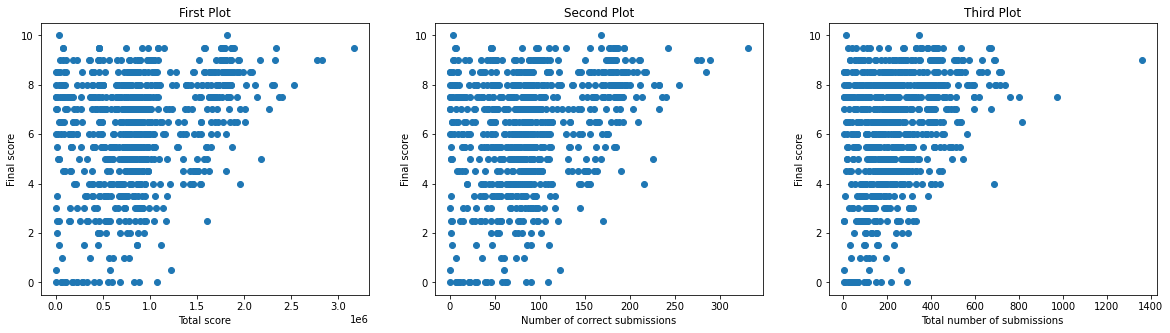

In [427]:
data_training=data_training.sort_values(by='CK').reset_index(drop=True)

_, (axes1, axes2, axes3) = plt.subplots(nrows=1, ncols=3 , figsize=(20, 5))

#1. Tổng số điểm của những bài có is_final = 1
axes1.scatter(data_training['sum_score'], y= data_training['CK'])
axes1.set(xlabel = 'Total score', ylabel = 'Final score', title = 'First Plot')

#2. Số lần submit đúng 
axes2.scatter(data_training['pre_full'], y= data_training['CK'])
axes2.set(xlabel = 'Number of correct submissions', ylabel = 'Final score', title = 'Second Plot')

#3. Tổng số lần submit
axes3.scatter(data_training['count_submit'], y= data_training['CK'])
axes3.set(xlabel = 'Total number of submissions', ylabel = 'Final score', title = 'Third Plot')

### Nhận xét :

* Tổng điểm của mỗi user_id có xu hướng phân bổ không đều và tăng dần theo số điểm cuối kì.
*Tổng số lần submit của các user phân bổ không đều, có xu hướng tăng dần theo điểm cuối kì
* Những user có số lần nộp cao hơn 500 đa số có số điểm từ 5 điểm trở lên, còn những user có số lần submit dưới 500, đa số có điểm cuối kỳ dưới 5 điểm.
* Có vẻ là những user nào có số lần submit nhiều thì điểm cuối kì đa số đạt điểm số cao.

In [428]:
# Thêm 3 cột : 
#Số lần submit đúng / Tổng số problem đã submit  (Heso_submit1)
#Số lần submit đúng / Tổng số lần submit         (Heso_submit2)
#Tổng số prolem đã submit / Tổng số lần submit   (Heso_submit3)
data_training['Heso_submit1'] =data_training.apply(lambda x: x['pre_full'] / x['sum_problem'], axis=1)

In [429]:
data_training['Heso_submit2'] =data_training.apply(lambda x: x['pre_full'] / x['count_submit'], axis=1)

In [431]:
data_training['Heso_submit3'] =data_training.apply(lambda x: x['sum_problem'] / x['count_submit'], axis=1)
data_training.head()

,user_id,sum_problem,count_submit,sum_score,pre_full,CK,Heso_submit1,Heso_submit2,Heso_submit3
0,562,30,92,294000,30,0.0,1.000000,0.326087,0.326087
1,1619,113,288,1080200,109,0.0,0.964602,0.378472,0.392361
2,166,28,32,227000,22,0.0,0.785714,0.687500,0.875000
3,1505,8,8,70000,7,0.0,0.875000,0.875000,1.000000
4,823,48,109,460000,46,0.0,0.958333,0.422018,0.440367


[Text(0, 0.5, 'Final score'),
 Text(0.5, 0, 'Heso_submit3'),
 Text(0.5, 1.0, 'Sixth Plot')]

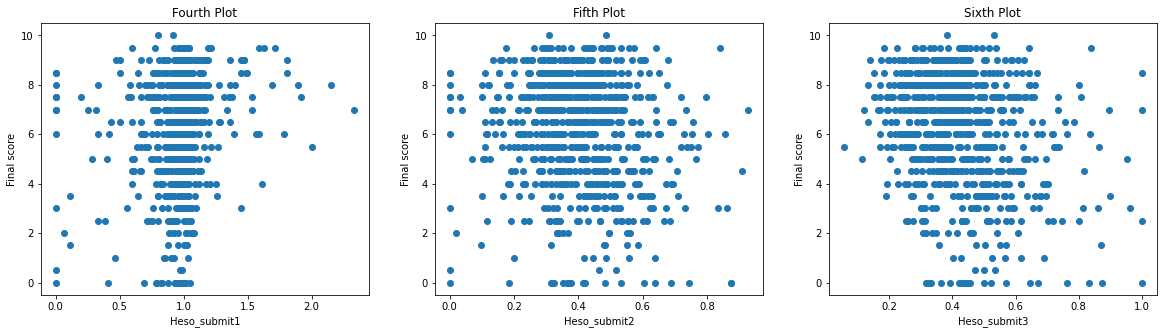

In [432]:
data_training=data_training.sort_values(by='CK').reset_index(drop=True)
data_training['CK'] = pd.to_numeric(data_training['CK'], errors='ignore', downcast='float')

_, (axes1, axes2, axes3) = plt.subplots(nrows=1, ncols=3 , figsize=(20, 5))

#4. Số lần đạt điểm tối đa trên tổng số problem
axes1.scatter(data_training['Heso_submit1'], data_training['CK'])
axes1.set(xlabel = 'Heso_submit1', ylabel = 'Final score', title = 'Fourth Plot')

#5. Tổng số lần submit đúng / tổng submit
axes2.scatter(data_training['Heso_submit2'], data_training['CK'])
axes2.set(xlabel = 'Heso_submit2', ylabel = 'Final score', title = 'Fifth Plot')

#6. Tổng problem đã submit / Tổng submit
axes3.scatter(data_training['Heso_submit3'], data_training['CK'])
axes3.set(xlabel = 'Heso_submit3', ylabel = 'Final score', title = 'Sixth Plot')

### Nhận xét :

## **XÂY DỰNG MODEL VÀ DỰ ĐOÁN ĐIỂM CUỐI KỲ**

Tham khảo tại: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html

In [433]:
#Chuyển từ bảng dữ liệu thành mảng
copy = data_training.copy()
copy = copy.drop(['CK'], axis = 1)

x_train = copy.to_numpy(dtype=float)
y_train = data_training['CK'].values

### **Dựng model dừng Linear Regression**

Tham khảo tại: https://www.askpython.com/python/examples/linear-regression-in-python

In [434]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [436]:
#Chạy model
y_pred = model.predict(x_train)
y_pred = [round(x, 1) for x in y_pred]

In [438]:
result_table = {'Predict Score': y_pred,
                'Real Score': y_train}
result = pd.DataFrame(result_table)
print("Chạy thử model trên traing set\n", result)

Chạy thử model trên traing set
      Predict Score  Real Score
0              5.8         0.0
1              5.2         0.0
2              5.6         0.0
3              5.9         0.0
4              5.4         0.0
..             ...         ...
801            8.2         9.5
802            7.6         9.5
803            8.4         9.5
804            7.0        10.0
805            5.2        10.0

[806 rows x 2 columns]


In [439]:
print("MSE khi dùng Linear Regression\nMSE = ", sm.mean_squared_error(y_train, y_pred))

MSE khi dùng Linear Regression
MSE =  4.245707196029777


### **Dựng model dùng Support Vector Regression.**

In [440]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
y_pred = [round(x, 1) for x in y_pred]

In [441]:
result_table = {'Predict Score': y_pred,
                'Real Score': y_train}
result = pd.DataFrame(result_table)
print("Chạy thử model trên traing set\n", result)

Chạy thử model trên traing set
      Predict Score  Real Score
0              6.0         0.0
1              6.3         0.0
2              6.2         0.0
3              6.1         0.0
4              6.4         0.0
..             ...         ...
801            8.6         9.5
802            8.1         9.5
803            7.5         9.5
804            8.0        10.0
805            6.4        10.0

[806 rows x 2 columns]


In [442]:
print("MSE khi dùng SVM\nMSE = ", sm.mean_squared_error(y_train, y_pred))

MSE khi dùng SVM
MSE =  4.586538461538462


Nhận xét:

MSE khi dùng Linear Regression thấp hơn 1 chút so với dùng SVM nên em sẽ dùng Linear Regression để dự đoán điểm cuối kỳ. 

### **Chạy dự đoán cho những sinh viên có điểm cuối kỳ còn trống**

In [444]:
#Lúc vẽ scatter plot chỉ cho chạy trên data_traing, chưa có 3 cột xây dựng thêm trên data_predict
data_predict['Heso_submit1'] =data_predict.apply(lambda x: x['pre_full'] / x['sum_problem'], axis=1)
data_predict['Heso_submit2'] =data_predict.apply(lambda x: x['pre_full'] / x['count_submit'], axis=1)
data_predict['Heso_submit3'] =data_predict.apply(lambda x: x['sum_problem'] / x['count_submit'], axis=1)
data_predict.head()

,user_id,sum_problem,count_submit,sum_score,pre_full,CK,Heso_submit1,Heso_submit2,Heso_submit3
0,1,2,2,10000,1,NaN,0.500000,0.500000,1.000000
1,4,41,54,370000,44,NaN,1.073171,0.814815,0.759259
2,5,5,6,30000,3,NaN,0.600000,0.500000,0.833333
3,6,88,130,850000,89,NaN,1.011364,0.684615,0.676923
4,7,2,5,9209,0,NaN,0.000000,0.000000,0.400000


In [445]:
temp = data_predict.copy()
temp = temp.drop(['CK'], axis = 1)

x_pre = temp.to_numpy(dtype=float)
data_predict['CK'] = model.predict(x_pre)
data_predict['CK'] = [round(x, 1) for x in data_predict['CK']]


In [446]:
data_predict

,user_id,sum_problem,count_submit,sum_score,pre_full,CK,Heso_submit1,Heso_submit2,Heso_submit3
0,1,2,2,10000,1,3.6,0.500000,0.500000,1.000000
1,4,41,54,370000,44,3.7,1.073171,0.814815,0.759259
2,5,5,6,30000,3,3.9,0.600000,0.500000,0.833333
3,6,88,130,850000,89,4.8,1.011364,0.684615,0.676923
4,7,2,5,9209,0,5.5,0.000000,0.000000,0.400000
...,...,...,...,...,...,...,...,...,...
1149,1852,1,20,10000,5,8.4,5.000000,0.250000,0.050000
1150,1855,61,134,649000,63,6.2,1.032787,0.470149,0.455224
1154,1860,43,76,329665,29,5.5,0.674419,0.381579,0.565789
1156,1864,63,187,439741,30,6.4,0.476190,0.160428,0.336898
